In [1]:
import json
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow_probability as tfp
from tensorflow import keras

# 1. Retrieve and select Data

## 1.1 Retrieve Data from previous dataset

In [2]:
# Open the Dataset_training_2019_2023
filename = "Data\Dataset_training_2019_2023.json"

with open(filename, "r") as f:
    Dataset_2019_2023 = json.load(f)

In [3]:
filename = "Data\List_ID_McNulty.txt"
ID_session = []

with open(filename, "r") as f:
    for line in f:
        # Split the line into numbers using commas as separators
        numbers = [int(num) for num in line.strip().split(',')]
        ID_session.extend(numbers)

In [4]:
# Load the data-frame

df_session_info = pd.read_csv('Data\Dataset_training_McNulty.csv')

In [5]:
df_session_info.head()

,ID,Type,Date,Distance (Km),Duration (hh:mm:ss),Power avg (W),Nomalized Power (W),Heartrate avg (Bpm),Heartrate max (Bpm),Efficiency Factor,...,5min power (W) P2000Kj,8min power (W) P2000Kj,10min power (W) P2000Kj,12min power (W) P2000Kj,15min power (W) P2000Kj,20min power (W) P2000Kj,30min power (W) P2000Kj,45min power (W) P2000Kj,Intensity Factor,TSS
0,40370900,Ride,2012-01-07,0.38,00:07:11,NaN,NaN,118.0,139.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1,40370908,Ride,2012-01-08,75.61,03:02:15,NaN,NaN,139.0,196.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.0
2,40370906,Ride,2012-01-10,47.68,01:46:56,NaN,NaN,147.0,199.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.0
3,40370887,Ride,2012-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,40370893,Ride,2012-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
ID_session

[2951927158,
 2958739827,
 2960740491,
 2963751778,
 2966178360,
 2968899873,
 2971656619,
 2977046021,
 2978925344,
 2997084829,
 3008983781,
 3014996807,
 3031186996,
 3036629261,
 3039403034,
 3042049831,
 3060668847,
 3063483839,
 3067077538]

## 1.2 Filter to keep only subset with selected session

In [7]:
session_subset_mask = df_session_info["ID"].isin(ID_session)
subset_session_info = df_session_info.loc[session_subset_mask,:].reset_index(drop=True)

In [8]:
subset_session_info.head()

,ID,Type,Date,Distance (Km),Duration (hh:mm:ss),Power avg (W),Nomalized Power (W),Heartrate avg (Bpm),Heartrate max (Bpm),Efficiency Factor,...,5min power (W) P2000Kj,8min power (W) P2000Kj,10min power (W) P2000Kj,12min power (W) P2000Kj,15min power (W) P2000Kj,20min power (W) P2000Kj,30min power (W) P2000Kj,45min power (W) P2000Kj,Intensity Factor,TSS
0,2951927158,Ride,2019-12-23,123.86,03:44:09,257.0,285.0,143.0,179.0,1.80,...,397.0,396.0,396.0,392.0,352.0,315.0,NaN,NaN,0.732648,201.0
1,2958739827,Ride,2019-12-26,169.90,05:24:44,265.0,275.0,142.0,181.0,1.87,...,312.0,298.0,292.0,288.0,281.0,275.0,NaN,NaN,0.701173,266.0
2,2960740491,Ride,2019-12-27,86.26,02:29:20,283.0,319.0,137.0,178.0,2.07,...,249.0,250.0,247.0,248.0,243.0,236.0,NaN,NaN,0.813361,165.0
3,2963751778,Ride,2019-12-28,162.52,05:30:54,268.0,287.0,141.0,181.0,1.90,...,438.0,437.0,436.0,429.0,389.0,347.0,NaN,NaN,0.731770,295.0
4,2966178360,Ride,2019-12-29,57.62,02:07:53,205.0,214.0,109.0,132.0,1.88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.545640,63.0


In [9]:
Datasubset = {}
for ID in ID_session :
    ID =str(ID)
    Data_session = {ID : Dataset_2019_2023[ID]}
    Datasubset={**Datasubset,**Data_session}

In [10]:
len(Datasubset)

19

In [11]:
len(ID_session)

19

In [12]:
len(subset_session_info)

19

In [13]:
#Clean the dataset of all None value in the watts list, replace them by 0
for ID in Datasubset : 
    if ("watts" in Datasubset[ID]):
        Datasubset[ID]["watts"] = [0 if x is None else x for x in Datasubset[ID]["watts"]]
        Datasubset[ID]["watts"] = [0 if (x > 1500) else x for x in Datasubset[ID]["watts"]]

At the moment, we have the following features in our session :

In [14]:
print(list(Datasubset["2951927158"]))

['temp', 'watts', 'velocity_smooth', 'cadence', 'distance', 'heartrate', 'altitude', 'time', 'date', 'type']


We will add an exhaustion features which will represented all the work done in the session at any point, we add this becasue the heart rate response is impact by previous work done

In [15]:
for activity in Datasubset : 
    if ("watts" in Datasubset[activity]) and (any(Datasubset[f"{activity}"]["watts"])) :
        count = 0
        List_joule = []
        for power in Datasubset[f"{activity}"]["watts"] :
            count += power 
            List_joule.append(count)
         
        Datasubset[f"{activity}"]["Total Effort (KJ)"] = [round(x/1000,1) for x in List_joule]

In [16]:
with open('Data\Datasubset.json', 'w') as fp:
    json.dump(Datasubset, fp)

# 2. Classify or Cluster session

We need choose which features (columns) from subset_session_info we will used to classify or cluster the session

In [17]:
subset_session_info.columns

Index(['ID', 'Type', 'Date', 'Distance (Km)', 'Duration (hh:mm:ss)',
       'Power avg (W)', 'Nomalized Power (W)', 'Heartrate avg (Bpm)',
       'Heartrate max (Bpm)', 'Efficiency Factor', '1s power (W)',
       '5s power (W)', '10s power (W)', '15s power (W)', '30s power (W)',
       '45s power (W)', '60s power (W)', '2min power (W)', '3min power (W)',
       '5min power (W)', '8min power (W)', '10min power (W)',
       '12min power (W)', '15min power (W)', '20min power (W)',
       '30min power (W)', '45min power (W)', '60min power (W)',
       '5s power (W) P2000Kj', '30s power (W) P2000Kj',
       '60s power (W) P2000Kj', '3min power (W) P2000Kj',
       '5min power (W) P2000Kj', '8min power (W) P2000Kj',
       '10min power (W) P2000Kj', '12min power (W) P2000Kj',
       '15min power (W) P2000Kj', '20min power (W) P2000Kj',
       '30min power (W) P2000Kj', '45min power (W) P2000Kj',
       'Intensity Factor', 'TSS'],
      dtype='object')

In [18]:
subset_session_info.drop(columns = ['Type', 'Date','Efficiency Factor', '1s power (W)',
       '5s power (W)', '10s power (W)', '15s power (W)', '30s power (W)',
       '45s power (W)', '60s power (W)', '2min power (W)', '3min power (W)',
       '5min power (W)', '8min power (W)', '10min power (W)',
       '12min power (W)', '15min power (W)', '20min power (W)',
       '30min power (W)', '45min power (W)', '60min power (W)',
       '5s power (W) P2000Kj', '30s power (W) P2000Kj',
       '60s power (W) P2000Kj', '3min power (W) P2000Kj',
       '5min power (W) P2000Kj', '8min power (W) P2000Kj',
       '10min power (W) P2000Kj', '12min power (W) P2000Kj',
       '15min power (W) P2000Kj', '20min power (W) P2000Kj',
       '30min power (W) P2000Kj', '45min power (W) P2000Kj'],inplace=True)

In [19]:
subset_session_info.head(21)

,ID,Distance (Km),Duration (hh:mm:ss),Power avg (W),Nomalized Power (W),Heartrate avg (Bpm),Heartrate max (Bpm),Intensity Factor,TSS
0,2951927158,123.86,03:44:09,257.0,285.0,143.0,179.0,0.732648,201.0
1,2958739827,169.90,05:24:44,265.0,275.0,142.0,181.0,0.701173,266.0
2,2960740491,86.26,02:29:20,283.0,319.0,137.0,178.0,0.813361,165.0
3,2963751778,162.52,05:30:54,268.0,287.0,141.0,181.0,0.731770,295.0
4,2966178360,57.62,02:07:53,205.0,214.0,109.0,132.0,0.545640,63.0
5,2968899873,176.09,05:24:26,272.0,289.0,140.0,180.0,0.736869,294.0
6,2971656619,153.60,04:48:21,268.0,301.0,137.0,181.0,0.767466,283.0
7,2977046021,168.92,05:42:51,267.0,284.0,142.0,181.0,0.724120,300.0
8,2978925344,55.46,01:45:35,229.0,250.0,116.0,166.0,0.637430,72.0
9,2997084829,47.03,03:08:05,195.0,234.0,121.0,180.0,0.596939,112.0


In [20]:
for row in range(len(subset_session_info)):
    hours, minutes, seconds = map(int, (subset_session_info.loc[row, "Duration (hh:mm:ss)"]).split(":"))
    Duration_sec =  hours*3600 + minutes*60 + seconds
    subset_session_info.loc[row, "Duration (sec)"] = Duration_sec
    
subset_session_info.drop(columns =["Duration (hh:mm:ss)"],inplace=True)

In [21]:
subset_session_info.head(21)

,ID,Distance (Km),Power avg (W),Nomalized Power (W),Heartrate avg (Bpm),Heartrate max (Bpm),Intensity Factor,TSS,Duration (sec)
0,2951927158,123.86,257.0,285.0,143.0,179.0,0.732648,201.0,13449.0
1,2958739827,169.90,265.0,275.0,142.0,181.0,0.701173,266.0,19484.0
2,2960740491,86.26,283.0,319.0,137.0,178.0,0.813361,165.0,8960.0
3,2963751778,162.52,268.0,287.0,141.0,181.0,0.731770,295.0,19854.0
4,2966178360,57.62,205.0,214.0,109.0,132.0,0.545640,63.0,7673.0
5,2968899873,176.09,272.0,289.0,140.0,180.0,0.736869,294.0,19466.0
6,2971656619,153.60,268.0,301.0,137.0,181.0,0.767466,283.0,17301.0
7,2977046021,168.92,267.0,284.0,142.0,181.0,0.724120,300.0,20571.0
8,2978925344,55.46,229.0,250.0,116.0,166.0,0.637430,72.0,6335.0
9,2997084829,47.03,195.0,234.0,121.0,180.0,0.596939,112.0,11285.0


## 2.1 Let's try clustering

We start with k-means, as it work with distance we need to normalized the data

In [22]:
scaler = MinMaxScaler() 
subset_norm = pd.DataFrame(scaler.fit_transform(subset_session_info),columns = subset_session_info.columns)

In [23]:
def kmeans_set_up (df_norm,df_clean):
    tab=[]
    
    for i in range(1,10):
        kmeans=KMeans(n_clusters=i, n_init = 10)
        kmeans.fit(df_norm)
        tab.append(kmeans.inertia_)
    plt.plot(range(1,10),tab)
    plt.title("Eblow method")
    plt.xlabel("number of cluster")
    plt.ylabel("Intra-classe inertia")
    plt.show()
        
        
    k = int(input('How many cluster do you want ?'))
    kmeans = KMeans(n_clusters=k,max_iter=5000, n_init = 10)
    df_clean["label KMeans"] = kmeans.fit_predict(df_norm)
        
    return df_clean
def plot_cluster(df_clean):
        fig, axes = plt.subplots(3, 1, figsize=(20, 12))

        sns.scatterplot(ax=axes[0],data = df_clean, x=df_clean["Heartrate avg (Bpm)"], y=df_clean["Nomalized Power (W)"], hue = df_clean["label KMeans"],palette="tab10")
        #axes[0].set_title("Power data point labelize")

        sns.scatterplot(ax=axes[1],data = df_clean, x=df_clean["Distance (Km)"], y=df_clean["Intensity Factor"], hue = df_clean["label KMeans"],palette="tab10")
        #axes[1].set_title("Heartrate data point labelize")

        sns.scatterplot(ax=axes[2],data = df_clean, x=df_clean["Duration (sec)"], y=df_clean["TSS"], hue = df_clean["label KMeans"],palette="tab10")
        #axes[2].set_title("Cadence data point labelize");

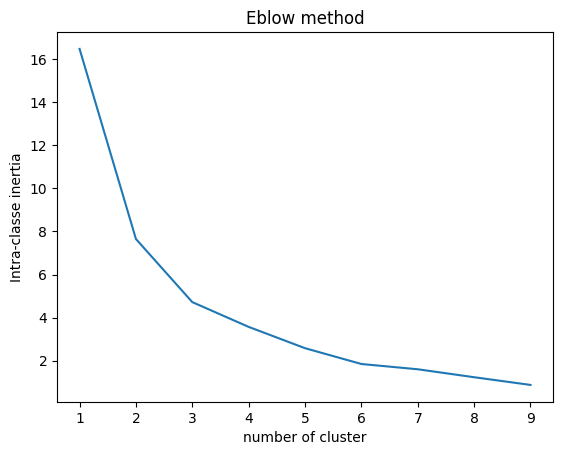

How many cluster do you want ? 3


,ID,Distance (Km),Power avg (W),Nomalized Power (W),Heartrate avg (Bpm),Heartrate max (Bpm),Intensity Factor,TSS,Duration (sec),label KMeans
0,2951927158,123.86,257.0,285.0,143.0,179.0,0.732648,201.0,13449.0,1
1,2958739827,169.90,265.0,275.0,142.0,181.0,0.701173,266.0,19484.0,1
2,2960740491,86.26,283.0,319.0,137.0,178.0,0.813361,165.0,8960.0,1
3,2963751778,162.52,268.0,287.0,141.0,181.0,0.731770,295.0,19854.0,1
4,2966178360,57.62,205.0,214.0,109.0,132.0,0.545640,63.0,7673.0,0
5,2968899873,176.09,272.0,289.0,140.0,180.0,0.736869,294.0,19466.0,1
6,2971656619,153.60,268.0,301.0,137.0,181.0,0.767466,283.0,17301.0,1
7,2977046021,168.92,267.0,284.0,142.0,181.0,0.724120,300.0,20571.0,1
8,2978925344,55.46,229.0,250.0,116.0,166.0,0.637430,72.0,6335.0,0
9,2997084829,47.03,195.0,234.0,121.0,180.0,0.596939,112.0,11285.0,0


In [24]:
kmeans_set_up (subset_norm,subset_session_info)

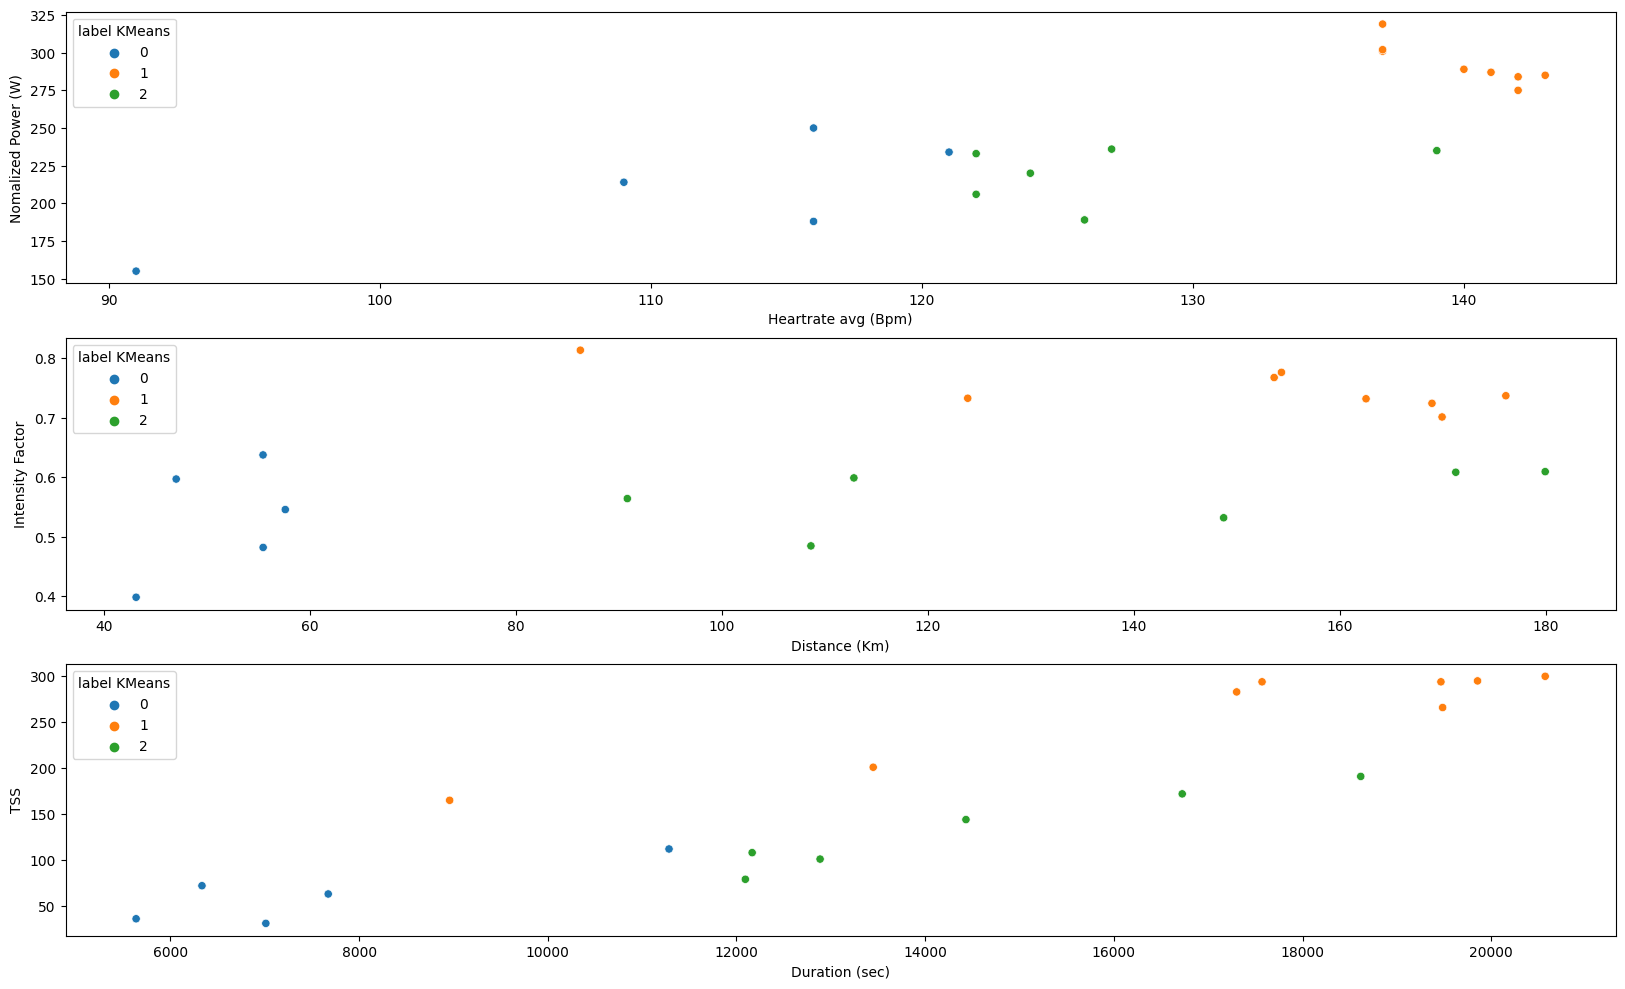

In [25]:
plot_cluster(subset_session_info)

## 2.2 Let's try classification

# 3. Predict heart rate

In [81]:
Datasubset = {int(key): value for key, value in Datasubset.items()}

we need to convert our dictionary to a dataframe in order to process data with a neural network 

In [82]:
df_subset = pd.DataFrame(columns = ['activity','temp', 'watts', 'velocity_smooth', 'cadence', 'distance', 'heartrate', 'altitude', 'time', 'date', 'type','Total Effort (KJ)'])

for activity in Datasubset :
    df_convert = pd.DataFrame(Datasubset[activity])
    df_convert["activity"]=activity
    df_subset = pd.concat([df_subset,df_convert])

In [83]:
df_subset.head()

,activity,temp,watts,velocity_smooth,cadence,distance,heartrate,altitude,time,date,type,Total Effort (KJ)
0,2951927158,23,0,0.3,0,2.2,67,470.0,8,23/12/2019,Ride,0.0
1,2951927158,23,0,0.7,0,4.0,69,470.0,9,23/12/2019,Ride,0.0
2,2951927158,23,0,0.8,0,4.9,71,470.0,10,23/12/2019,Ride,0.0
3,2951927158,23,0,1.7,0,9.2,71,471.0,11,23/12/2019,Ride,0.0
4,2951927158,23,0,2.1,0,11.1,72,470.0,12,23/12/2019,Ride,0.0


In [84]:
df_subset.isnull().sum()

activity             0
temp                 0
watts                0
velocity_smooth      0
cadence              0
distance             0
heartrate            0
altitude             0
time                 0
date                 0
type                 0
Total Effort (KJ)    0
dtype: int64

In [85]:
df_subset.dtypes

activity              object
temp                  object
watts                 object
velocity_smooth      float64
cadence               object
distance             float64
heartrate             object
altitude             float64
time                  object
date                  object
type                  object
Total Effort (KJ)    float64
dtype: object

In [86]:
df_subset[['heartrate', 'temp', 'watts', 'cadence', 'Total Effort (KJ)','altitude']] = df_subset[['heartrate', 'temp', 'watts', 'cadence', 'Total Effort (KJ)','altitude']].astype(float)


In [87]:
for x in df_subset:
    print (x)

activity
temp
watts
velocity_smooth
cadence
distance
heartrate
altitude
time
date
type
Total Effort (KJ)


In [88]:
#cols = ['heartrate','temp', 'watts', 'cadence', 'distance', 'altitude','Total Effort (KJ)']
#cols = ['heartrate','temp', 'watts', 'cadence', 'altitude','Total Effort (KJ)']
cols = ['heartrate','temp', 'watts', 'cadence','Total Effort (KJ)','altitude']
#cols = ['heartrate', 'watts', 'cadence']

mean = df_subset[cols].mean()
std = df_subset[cols].std()
df_subset = [(y - mean) / std for x, y in df_subset[cols + ["activity"]].groupby('activity', as_index=False)]
#df_subset = [y for x, y in df_subset[cols + ["activity"]].groupby('activity', as_index=False)]
# average every 10 seconds
df_subset = [x.groupby(np.arange(len(x))//10).mean() for x in df_subset]
#print(df_subset[0:2])

ts_len = [x.shape[0] for x in df_subset]

X = [np.array(x[cols[1:]], dtype="float32") for x in df_subset]
Y = [np.array(x[cols[0:1]], dtype="float32") for x in df_subset]
Y = [np.hstack([y, np.ones_like(y)]) for y in Y]



C:\Users\Violeau Pierre\AppData\Local\Temp\ipykernel_15264\1242779474.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_subset = [x.groupby(np.arange(len(x))//10).mean() for x in df_subset]
C:\Users\Violeau Pierre\AppData\Local\Temp\ipykernel_15264\1242779474.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_subset = [x.groupby(np.arange(len(x))//10).mean() for x in df_subset]
C:\Users\Violeau Pierre\AppData\Local\Temp\ipykernel_15264\1242779474.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False.

In [90]:
X = keras.preprocessing.sequence.pad_sequences(X, dtype='float32', maxlen = 1000)
Y = keras.preprocessing.sequence.pad_sequences(Y, dtype = "float32", maxlen = 1000)

In [91]:
print(X.shape)
print(Y.shape)

(19, 1000, 5)
(19, 1000, 2)


In [106]:
n_params = tfp.layers.IndependentNormal.params_size(1)

model = keras.Sequential([
    keras.Input((None, 5)),
    keras.layers.GRU(8, return_sequences = True),
    keras.layers.Conv1D(n_params, 1),
    tfp.layers.IndependentNormal(1)
])

def loss_mll(y, distr):
    return -distr.log_prob(y[:,:,0:1]) * y[:,:,1]

model.compile(keras.optimizers.Adam(0.01), loss=loss_mll)

In [107]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_6 (GRU)                 (None, None, 8)           360       
                                                                 
 conv1d_6 (Conv1D)           (None, None, 2)           18        
                                                                 
 independent_normal_6 (Inde  ((None, None, 1),         0         
 pendentNormal)               (None, None, 1))                   
                                                                 
Total params: 378 (1.48 KB)
Trainable params: 378 (1.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [108]:
model.fit(X, Y, epochs=20, validation_split = 0.3, batch_size = 10)

Epoch 1/20
2/2 [==============================] - 6s 1s/step - loss: 2.4573 - val_loss: 2.5710
Epoch 2/20
2/2 [==============================] - 1s 562ms/step - loss: 1.7054 - val_loss: 2.2594
Epoch 3/20
2/2 [==============================] - 1s 553ms/step - loss: 1.3390 - val_loss: 1.9447
Epoch 4/20
2/2 [==============================] - 1s 561ms/step - loss: 1.1526 - val_loss: 1.7095
Epoch 5/20
2/2 [==============================] - 1s 573ms/step - loss: 1.0609 - val_loss: 1.5207
Epoch 6/20
2/2 [==============================] - 1s 562ms/step - loss: 1.0148 - val_loss: 1.3706
Epoch 7/20
2/2 [==============================] - 1s 566ms/step - loss: 0.9901 - val_loss: 1.2575
Epoch 8/20
2/2 [==============================] - 1s 579ms/step - loss: 0.9573 - val_loss: 1.1723
Epoch 9/20
2/2 [==============================] - 1s 555ms/step - loss: 0.9251 - val_loss: 1.1062
Epoch 10/20
2/2 [==============================] - 1s 563ms/step - loss: 0.8887 - val_loss: 1.0574
Epoch 11/20
2/2 [=====

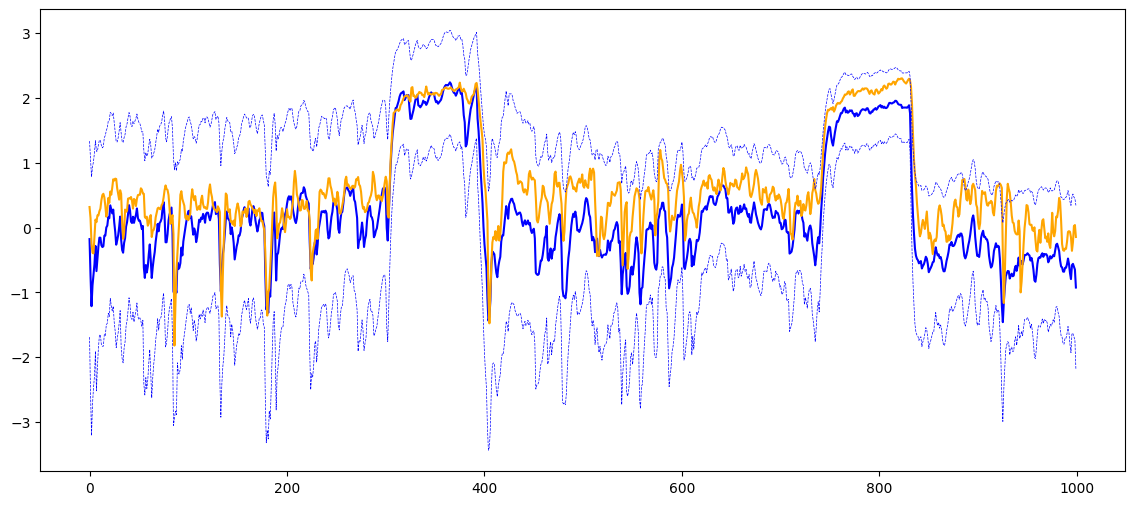

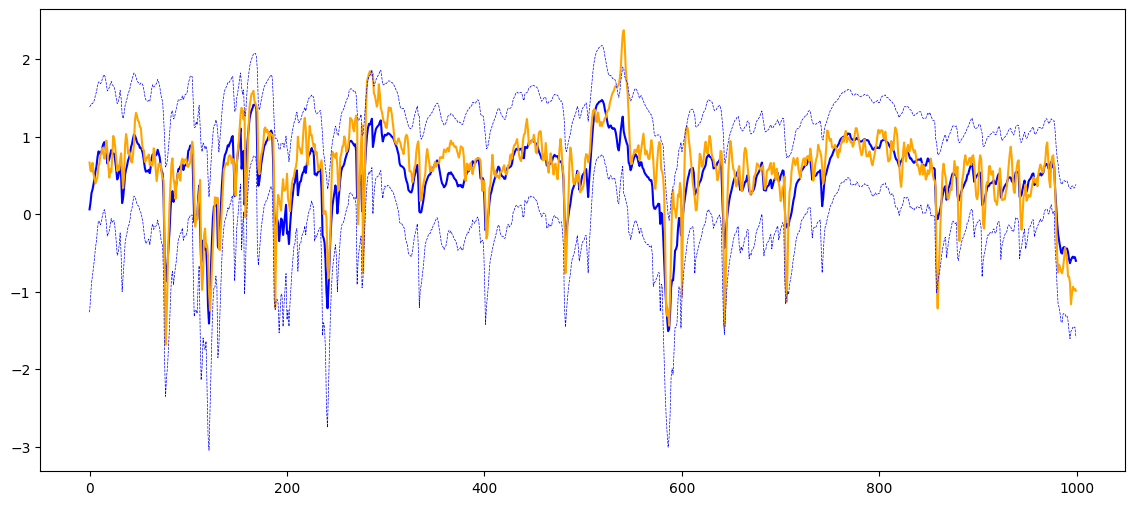

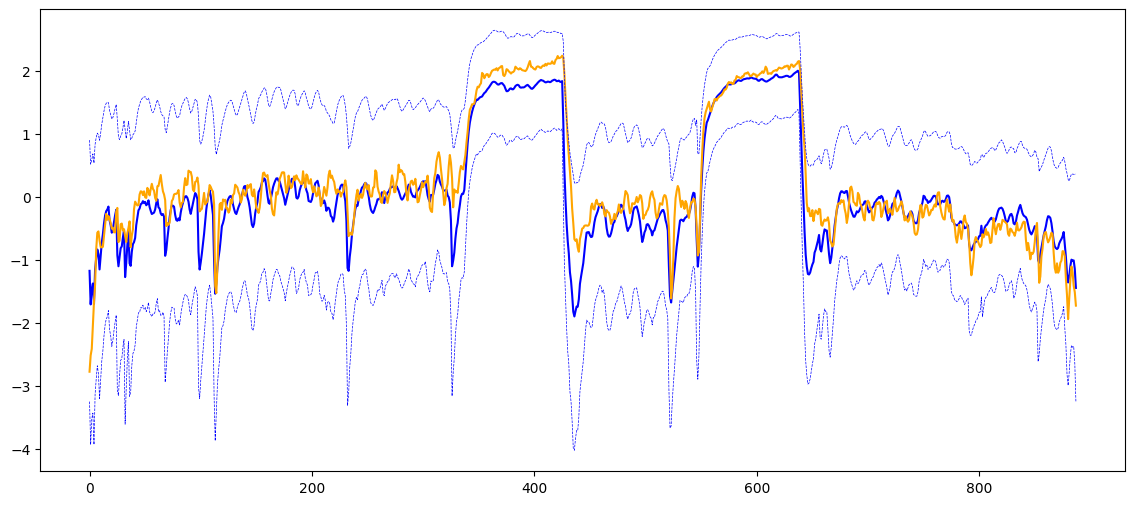

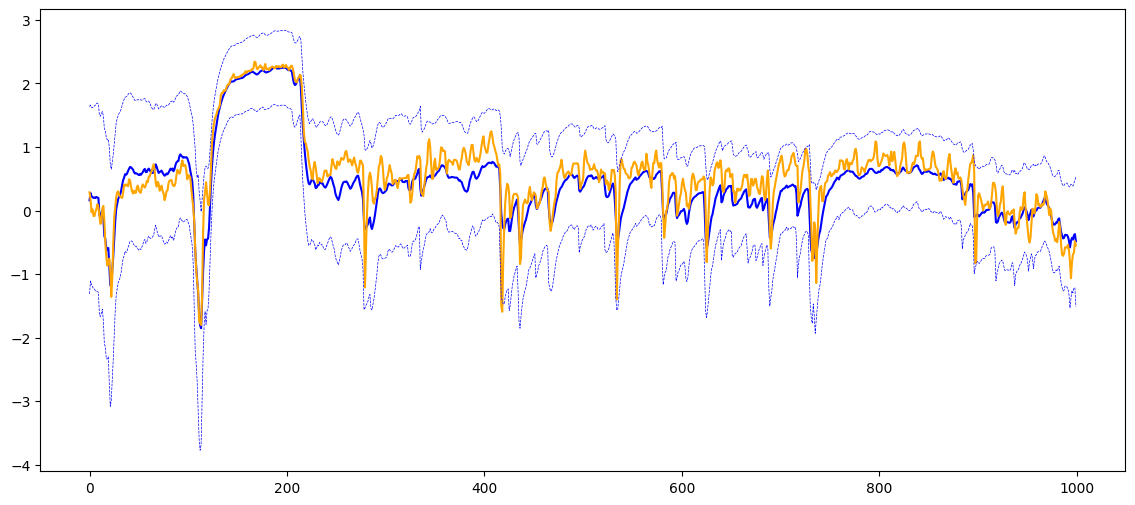

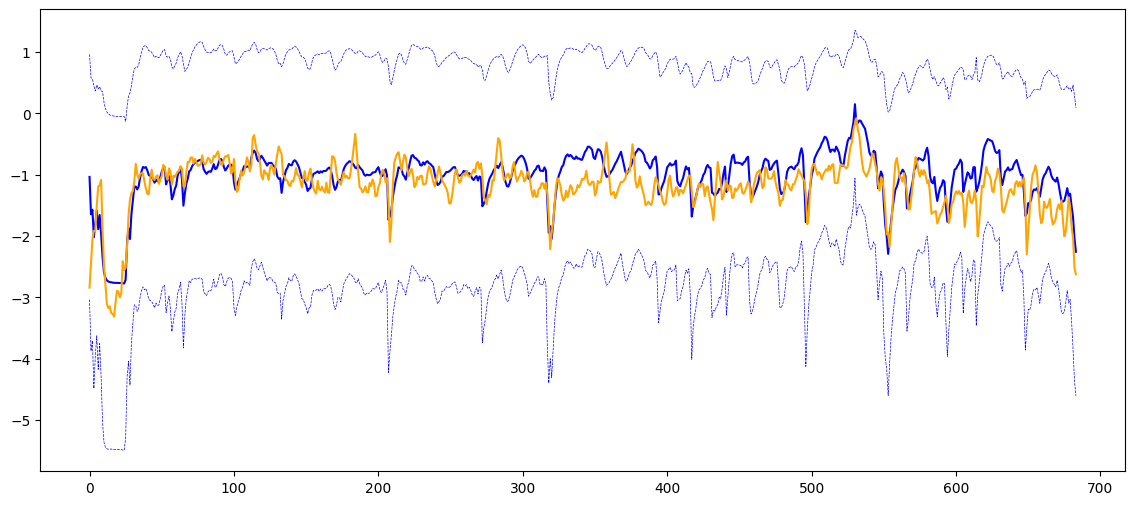

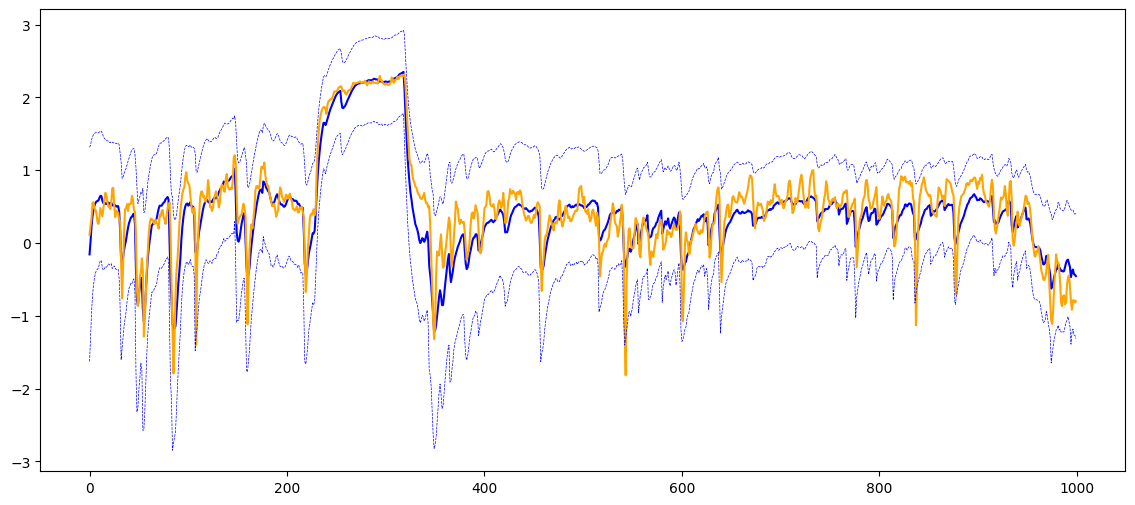

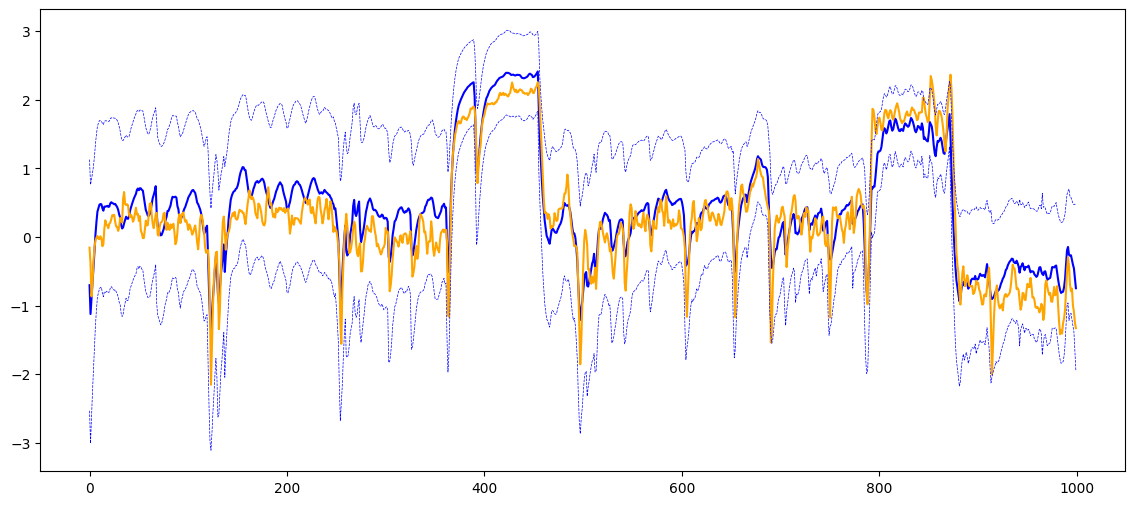

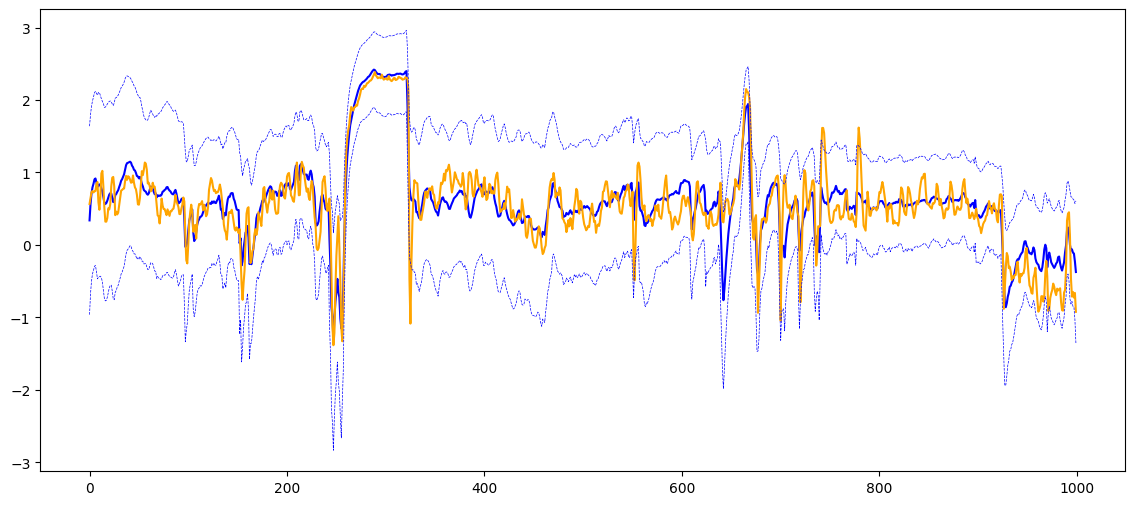

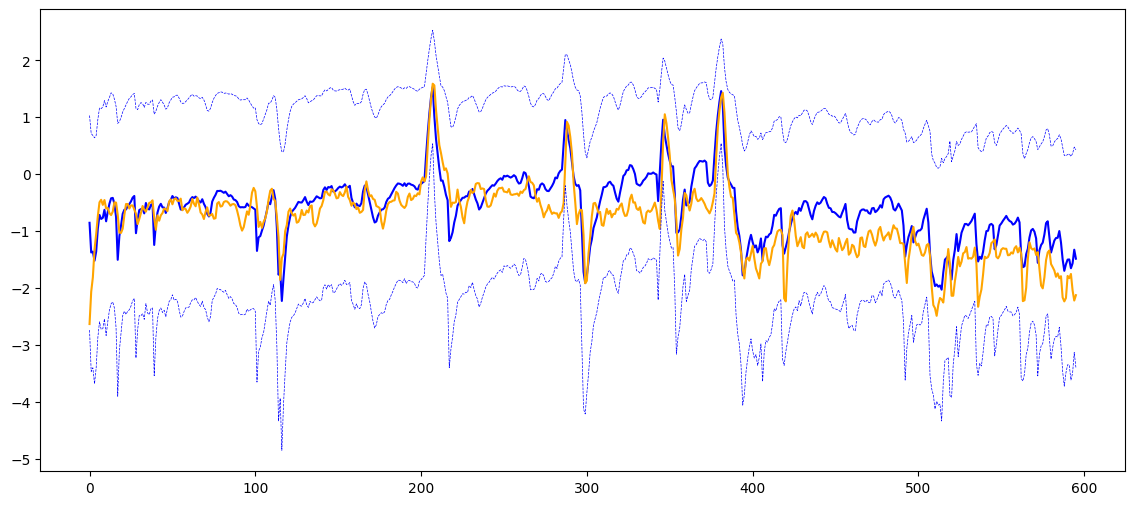

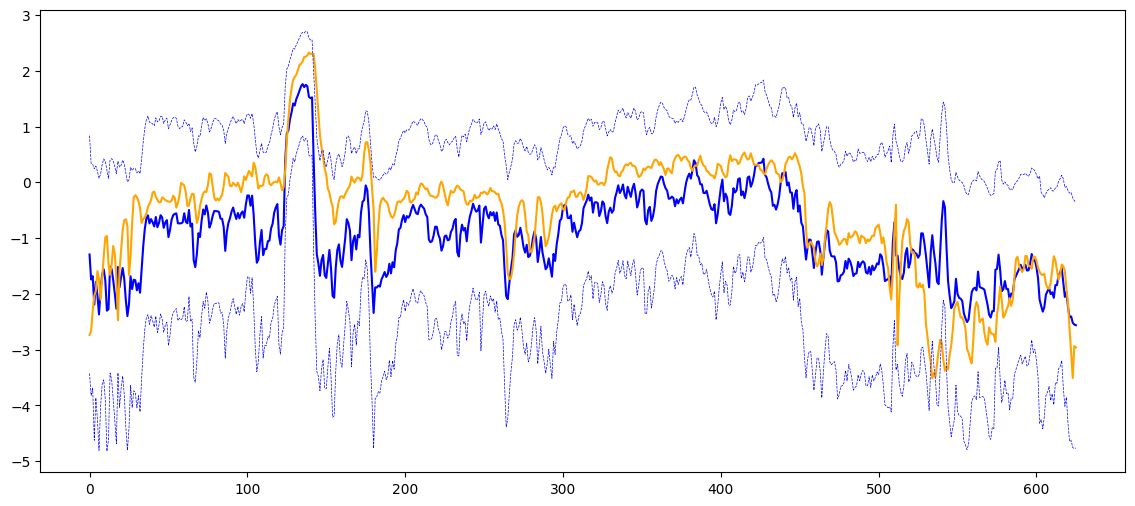

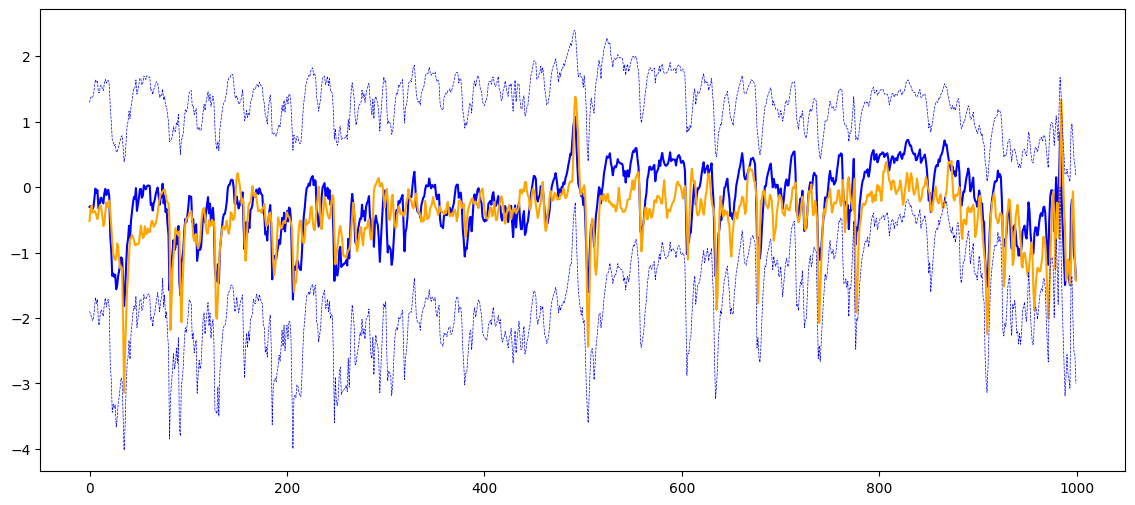

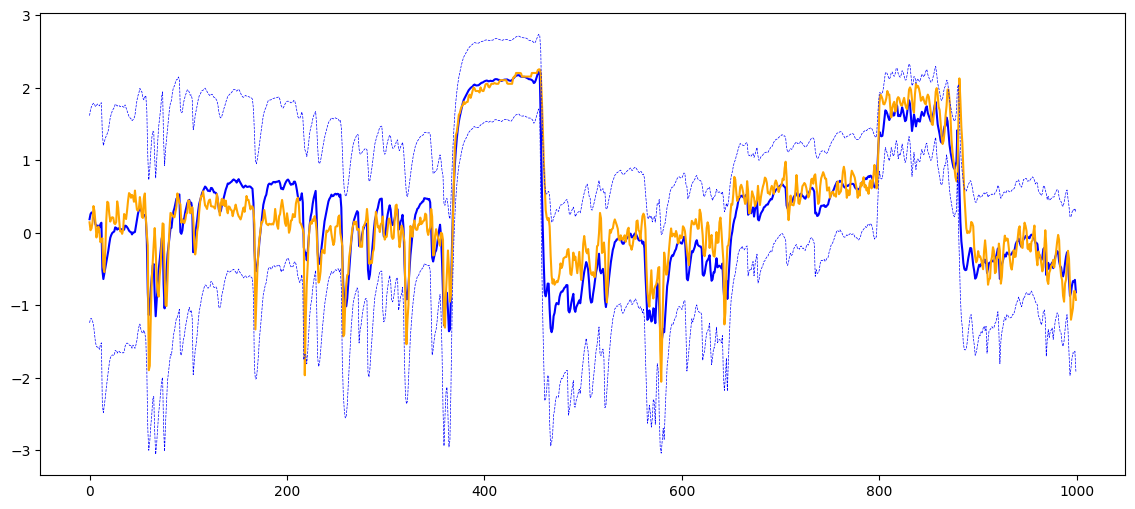

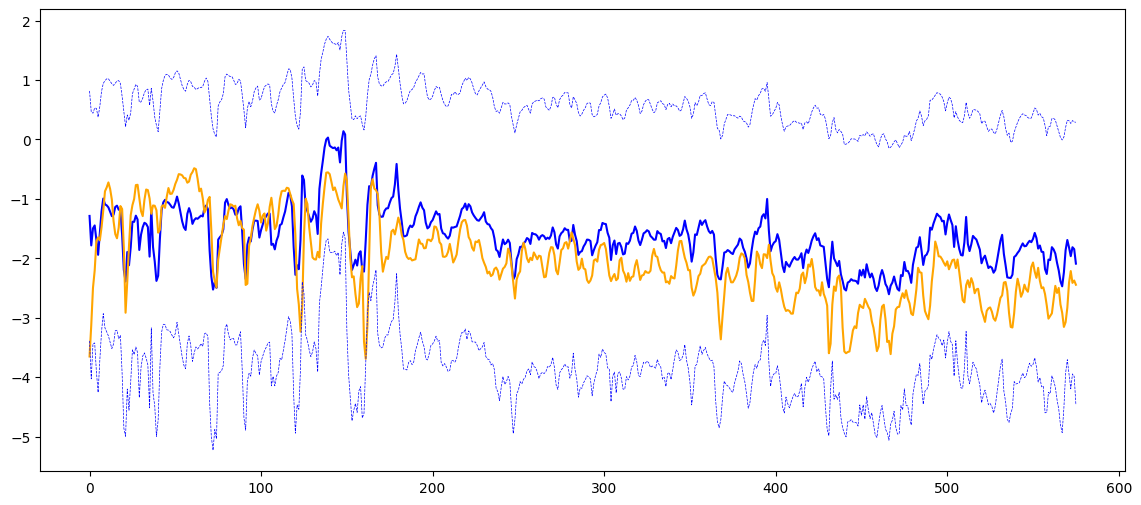

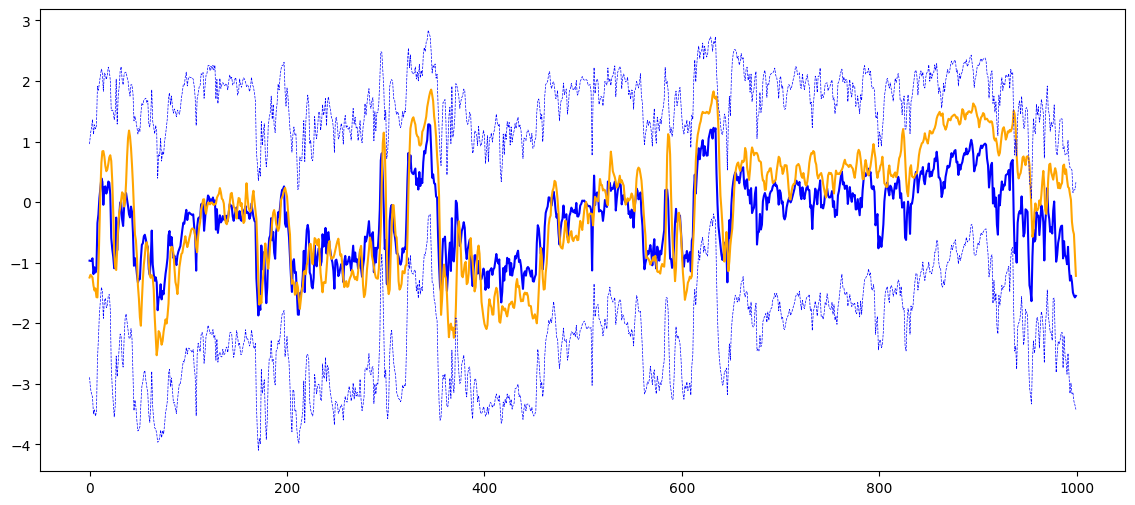

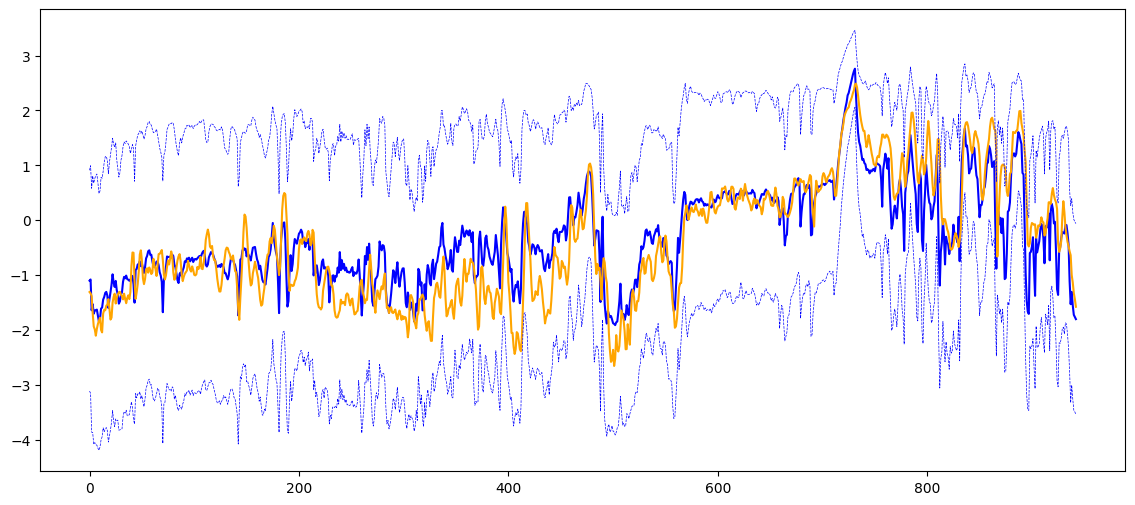

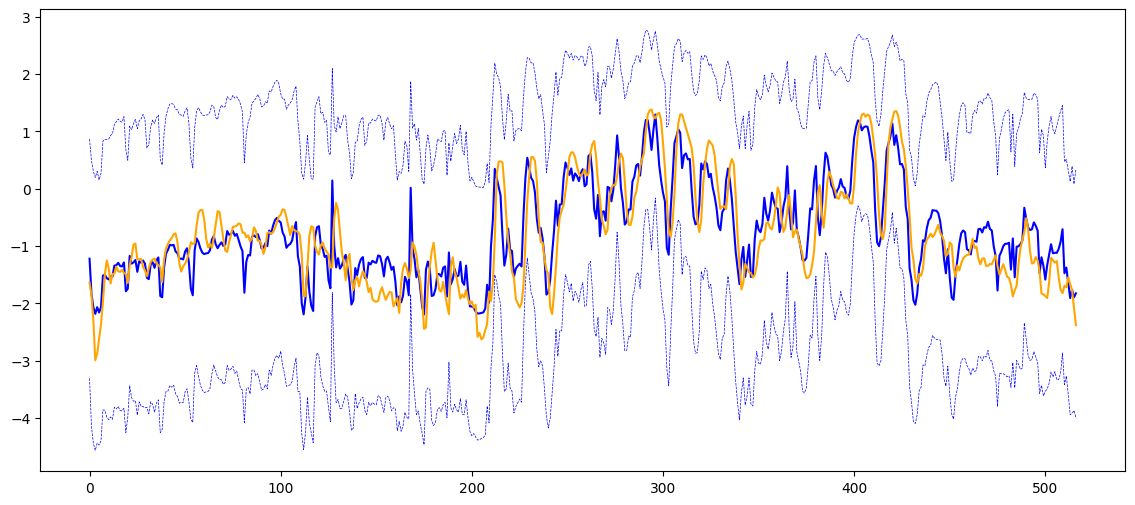

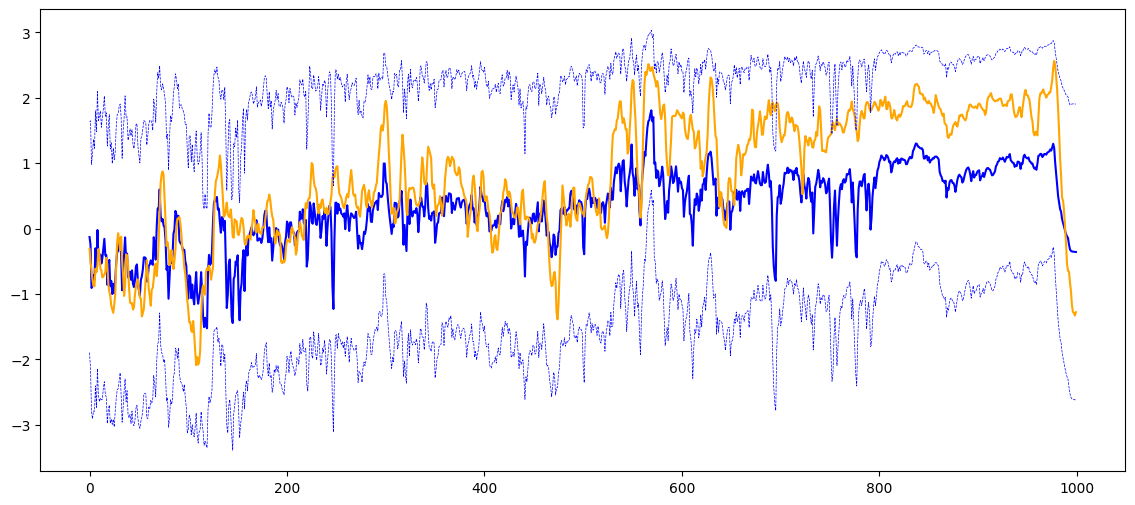

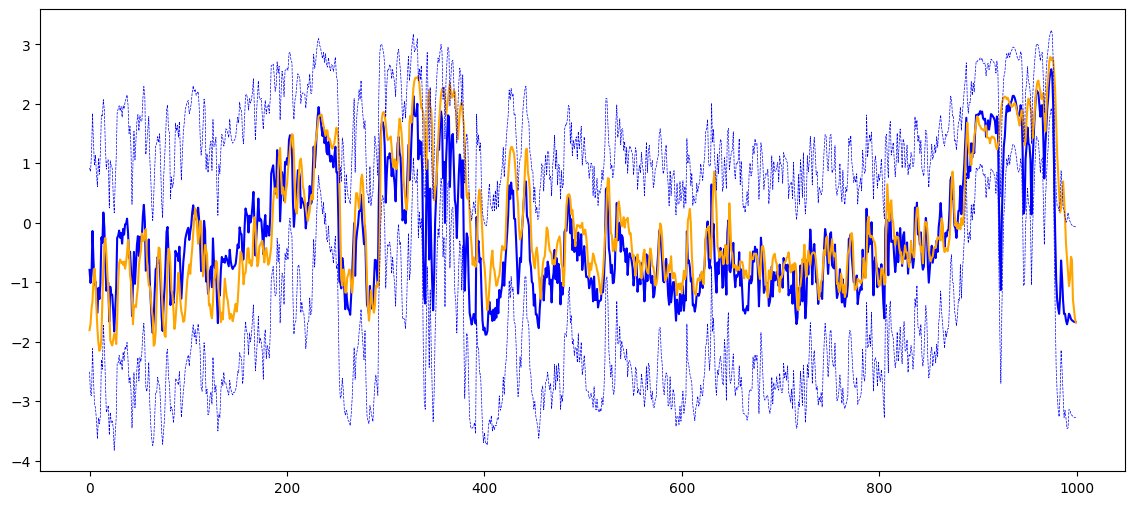

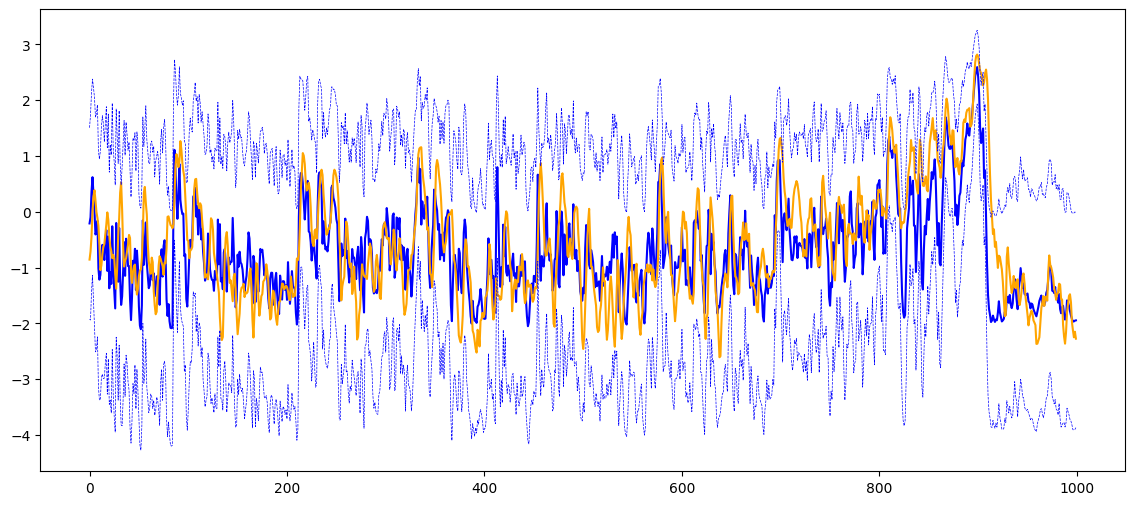

In [109]:
for idx in range(19) :
    distr = model(X[idx:(idx+1)])

    pred_mean = distr.mean().numpy()[0, -ts_len[idx]:, 0]
    pred_std = distr.stddev().numpy()[0, -ts_len[idx]:, 0]

    plt.subplots(1, 1, figsize=(14, 6));
    plt.plot(pred_mean, "b")
    plt.plot(Y[idx, Y[idx, :, 1] == 1, 0], "orange")
    plt.plot(pred_mean + 2 * pred_std, "b--", linewidth=0.5)
    plt.plot(pred_mean - 2 * pred_std, "b--", linewidth=0.5)